**Example** 1 We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.

![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image001.png)

In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are, $$Maximize : A=xy$$$$Constraint : 500 = x + 2y$$

In [0]:
# 1.1 輸入tensorflow 和 其他函式庫
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy
from sympy import*
from sympy import*

In [0]:
def test(y):
    return 500*y-2*y**2

In [5]:
y = Symbol('y')     #定義y為未知數
solve(diff(test(y), y))    #對 500y - 2y^2微分,並解出理論解(Y的GA)

[125]

In [16]:
y1 = 125
x1 = 500 - 2*y1
A = x1 * y1
print('x1 = ',x1,',y1 = ',y1,',A = ',A)

x1 =  250 ,y1 =  125 ,A =  31250


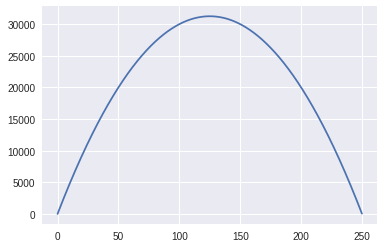

In [23]:
# 1.2 使用 numpy 創建輸入資料
x = np.arange(0.0,250.0,0.1)
y = test(x)
plt.plot(x,y)

In [9]:
y = tf.Variable(tf.random_uniform([1], 0, 250))

loss = test(y)  # 創建計算loss值的操作.
optimizer = tf.train.GradientDescentOptimizer(-0.1)  # 建立優化器
train = optimizer.minimize(loss)  #建立一個操作最小的loss值
init = tf.initialize_all_variables()  # 創建一個操作初始化所有變數

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
sess = tf.Session()
sess.run(init)
#y _ 初始 _ value = sess. run (x) # 保存初始值, 以便以後繪製

# Uncomment the following line to see the initial W and b values.
print(sess.run([y]))

[array([33.773335], dtype=float32)]


In [19]:
for step in range(201):
    sess.run(train)   
print(sess.run([y]))

[array([124.99999], dtype=float32)]


In [13]:
!pip install gaft

In [27]:
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation

# 基本插入軟件的分析.
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis

# 建置最佳的合格分析.
from gaft.analysis.fitness_store import FitnessStore

# 定義.
indv_template = BinaryIndividual(ranges=[(0, 250)], eps=0.001)
population = Population(indv_template=indv_template, size=30).init()

# 建立遺傳因子.
selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

# 建立基因演算法.
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[FitnessStore])

# 定義適合的function.
@engine.fitness_register
def fitness(indv):
    x, = indv.solution
    return test(x)

# 定義即時分析.
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    interval = 1
    master_only = True

    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g, engine.ori_fmax)
        self.logger.info(msg)

    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        y = engine.ori_fmax
        msg = 'Optimal solution: ({}, {})'.format(x, y)
        self.logger.info(msg)

if '__main__' == __name__:
    # Run the GA engine.
    engine.run(ng=1000)

gaft.ConsoleOutputAnalysis   INFO     Generation: 0, best fitness: 31245.962
gaft.ConsoleOutputAnalysis   INFO     Generation: 1, best fitness: 31245.962
gaft.ConsoleOutputAnalysis   INFO     Generation: 2, best fitness: 31245.962
gaft.ConsoleOutputAnalysis   INFO     Generation: 3, best fitness: 31246.954
gaft.ConsoleOutputAnalysis   INFO     Generation: 4, best fitness: 31246.954
gaft.ConsoleOutputAnalysis   INFO     Generation: 5, best fitness: 31248.063
gaft.ConsoleOutputAnalysis   INFO     Generation: 6, best fitness: 31248.063
gaft.ConsoleOutputAnalysis   INFO     Generation: 7, best fitness: 31248.063
gaft.ConsoleOutputAnalysis   INFO     Generation: 8, best fitness: 31248.070
gaft.ConsoleOutputAnalysis   INFO     Generation: 9, best fitness: 31248.070
gaft.ConsoleOutputAnalysis   INFO     Generation: 10, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 11, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 12, best fitness: 31250.

In [11]:
Y_GA = 125
X_GA = 500 - 2*Y_GA
A_GA = X_GA * Y_GA
print('x_GA = ',X_GA ,',y_GA = ', Y_GA , ', A_GA = ',A_GA)

x_GA =  250 ,y_GA =  125 , A_GA =  31250
